In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scs
import joblib
import yaml
import matplotlib.pyplot as plt

# 1. Import Params

In [2]:
params_dir = "config/params.yaml"

In [3]:
def load_params(param_dir):
    with open(param_dir, 'r') as file:
        params = yaml.safe_load(file)
        
    return params

In [4]:
params = load_params(params_dir)

In [5]:
params

{'dataset_dir': 'data/raw/',
 'datetime_columns': ['tanggal'],
 'int32_columns': ['pm10', 'pm25', 'so2', 'co', 'o3', 'no2', 'max'],
 'label': 'categori',
 'label_categories': ['BAIK', 'SEDANG', 'TIDAK SEHAT'],
 'label_categories_new': ['BAIK', 'TIDAK BAIK'],
 'missing_value_co': 11,
 'missing_value_no2': 18,
 'missing_value_o3': 29,
 'missing_value_pm10': {'BAIK': 28, 'TIDAK BAIK': 55},
 'missing_value_pm25': {'BAIK': 38, 'TIDAK BAIK': 82},
 'missing_value_so2': 35,
 'object_columns': ['stasiun', 'critical', 'categori'],
 'predictors': ['stasiun', 'pm10', 'pm25', 'so2', 'co', 'o3', 'no2'],
 'range_co': [-1, 100],
 'range_no2': [-1, 100],
 'range_o3': [-1, 160],
 'range_pm10': [-1, 800],
 'range_pm25': [-1, 400],
 'range_so2': [-1, 500],
 'range_stasiun': ['DKI1 (Bunderan HI)',
  'DKI2 (Kelapa Gading)',
  'DKI3 (Jagakarsa)',
  'DKI4 (Lubang Buaya)',
  'DKI5 (Kebon Jeruk) Jakarta Barat']}

## 2. Load Train Set

In [8]:
x_train = joblib.load("data/processed/x_train.pkl")
y_train = joblib.load("data/processed/y_train.pkl")

In [9]:
x_train

,stasiun,pm10,pm25,so2,co,o3,no2
1498,DKI5 (Kebon Jeruk) Jakarta Barat,48,63,32,8,28,30
1522,DKI1 (Bunderan HI),25,42,20,8,18,22
1426,DKI2 (Kelapa Gading),61,85,33,23,37,44
408,DKI4 (Lubang Buaya),48,68,36,13,24,14
150,DKI1 (Bunderan HI),57,81,30,11,32,38
...,...,...,...,...,...,...,...
217,DKI3 (Jagakarsa),48,67,51,6,34,11
16,DKI1 (Bunderan HI),42,66,29,7,26,20
1391,DKI1 (Bunderan HI),52,71,61,15,20,15
604,DKI5 (Kebon Jeruk) Jakarta Barat,48,79,34,7,24,17


In [10]:
y_train

1498    SEDANG
1522      BAIK
1426    SEDANG
408     SEDANG
150     SEDANG
         ...  
217     SEDANG
16      SEDANG
1391    SEDANG
604     SEDANG
1348    SEDANG
Name: categori, Length: 1266, dtype: object

In [11]:
dataset = pd.concat([x_train, y_train], axis = 1)

In [12]:
dataset

,stasiun,pm10,pm25,so2,co,o3,no2,categori
1498,DKI5 (Kebon Jeruk) Jakarta Barat,48,63,32,8,28,30,SEDANG
1522,DKI1 (Bunderan HI),25,42,20,8,18,22,BAIK
1426,DKI2 (Kelapa Gading),61,85,33,23,37,44,SEDANG
408,DKI4 (Lubang Buaya),48,68,36,13,24,14,SEDANG
150,DKI1 (Bunderan HI),57,81,30,11,32,38,SEDANG
...,...,...,...,...,...,...,...,...
217,DKI3 (Jagakarsa),48,67,51,6,34,11,SEDANG
16,DKI1 (Bunderan HI),42,66,29,7,26,20,SEDANG
1391,DKI1 (Bunderan HI),52,71,61,15,20,15,SEDANG
604,DKI5 (Kebon Jeruk) Jakarta Barat,48,79,34,7,24,17,SEDANG


In [13]:
dataset.describe()

,pm10,pm25,so2,co,o3,no2
count,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.00000
mean,50.591627,74.102686,33.012638,11.674566,30.441548,19.49842
std,17.155091,27.790928,14.836069,5.299409,15.382352,9.55990
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000
25%,42.000000,59.000000,24.000000,8.000000,21.000000,13.00000
50%,53.000000,77.000000,33.000000,11.000000,28.000000,18.00000
75%,61.000000,91.000000,43.000000,14.000000,38.000000,25.00000
max,179.000000,174.000000,82.000000,47.000000,151.000000,65.00000


## 3.  EDA

In [15]:
# Cek Missing Value

# ubah kembali nilai yang awalnya adalah -1 menjadi NaN
dataset.replace(-1, np.nan, inplace = True)

In [16]:
# cek null value
dataset.isnull().sum()

stasiun      0
pm10        37
pm25        57
so2         67
co          14
o3          38
no2         10
categori     0
dtype: int64

### cek informasi statistik

In [17]:
# cek skewness
dataset.skew(numeric_only = True)

pm10    0.267488
pm25    0.188977
so2     0.208078
co      1.723918
o3      1.652837
no2     0.908971
dtype: float64

In [ ]:
# kolom co, o3 dan no2 > +- 0.5, maka dari itu kolom tersebut akan diimputasi dengan median
# kolom lainnya akan diimputasi dengan mean

In [18]:
# Pemisahan Dataset berdasarkan Kelas
# pisahkan menjadi 2 kelas untuk melihat apakah kita perlu melakukan imputasi berdasarkan kelas
dataset_baik = dataset[dataset.categori == "BAIK"].copy()
dataset_tidak_baik = dataset[dataset.categori != "BAIK"].copy()

In [19]:
# kelas 1
dataset_baik.describe()

,pm10,pm25,so2,co,o3,no2
count,126.000000,98.000000,129.000000,132.000000,130.000000,125.000000
mean,28.373016,39.081633,25.248062,8.696970,26.323077,11.280000
std,7.836054,8.215742,11.027686,4.601592,11.011773,6.846944
min,14.000000,13.000000,3.000000,2.000000,7.000000,3.000000
25%,23.000000,34.000000,17.000000,5.750000,16.000000,6.000000
50%,28.000000,40.000000,22.000000,8.000000,24.500000,10.000000
75%,33.000000,46.000000,36.000000,11.000000,35.000000,14.000000
max,50.000000,50.000000,49.000000,28.000000,49.000000,49.000000


In [20]:
# kelas 0
dataset_tidak_baik.describe()

,pm10,pm25,so2,co,o3,no2
count,1103.000000,1111.000000,1070.000000,1120.000000,1098.000000,1131.000000
mean,54.860381,81.045005,36.078505,12.183929,32.017304,20.587975
std,12.915561,20.691073,12.518551,5.094470,14.827500,9.208019
min,19.000000,21.000000,2.000000,3.000000,9.000000,1.000000
25%,48.000000,67.000000,26.000000,9.000000,22.000000,14.000000
50%,55.000000,80.000000,36.000000,11.000000,28.000000,19.000000
75%,62.000000,93.000000,45.000000,14.000000,38.000000,26.000000
max,179.000000,174.000000,82.000000,47.000000,151.000000,65.000000


In [ ]:
# pm10      : mean dari kelas 0 dan 1 terpaut cukup jauh, maka akan menggunakan kelas
# pm25      : mean dari kelas 0 dan 1 terpaut cukup jauh, maka akan menggunakan kelas
# so2       : mean dari kelas 0 dan 1 tidak terpaut jauh, maka tidak akan menggunakan kelas
# co        : median dari kelas 0 dan 1 tidak terpaut jauh, maka tidak akan menggunakan kelas
# o3        : median dari kelas 0 dan 1 tidak terpaut jauh, maka tidak akan menggunakan kelas
# no2       : median dari kelas 0 dan 1 tidak terpaut jauh, maka tidak akan menggunakan kelas

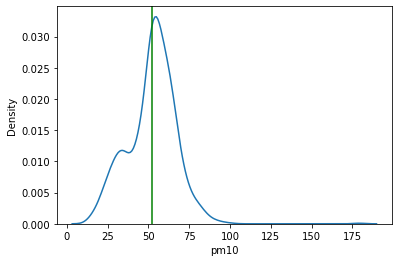

In [21]:
# visualisasi untuk PM10

# plot untuk melihat distribusi pm10 jika tidak dibedakan berdasarkan categori
sns.kdeplot(data = dataset.replace("SEDANG", "TIDAK SEHAT"), x = "pm10")
plt.axvline(dataset.pm10.mean(), 0, 1, color = "g")

In [36]:
dataset[dataset["pm10"]>=100]

,stasiun,pm10,pm25,so2,co,o3,no2,categori
1464,DKI4 (Lubang Buaya),179.0,58.0,39.0,9.0,17.0,15.0,TIDAK SEHAT
257,DKI4 (Lubang Buaya),100.0,157.0,41.0,15.0,50.0,26.0,TIDAK SEHAT


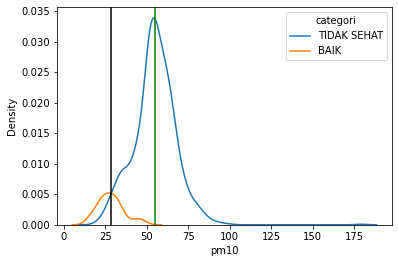

In [22]:
# plot untuk melihat distribusi pm10 jika dibedakan berdasarkan categori
sns.kdeplot(data = dataset.replace("SEDANG", "TIDAK SEHAT"), x = "pm10", hue = "categori")
plt.axvline(dataset_tidak_baik.pm10.mean(), 0, 1, color = "g")
plt.axvline(dataset_baik.pm10.mean(), 0, 1, color = "k")

In [ ]:
# distribusi skew ke kiri (nilai skew fisher-pearson negatif) imputasi median
# mean 2 kelas berbeda jauh, imputasi berdasarkan kelas
# kesimpulan: untuk pm10 akan menggunakan mean dari perkelas untuk imputasi

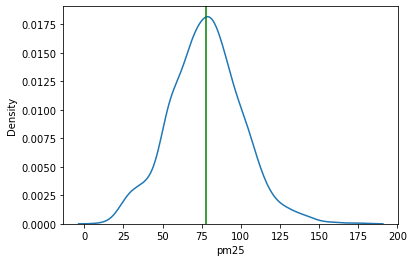

In [23]:
# visualisasi untuk PM25

sns.kdeplot(data = dataset.replace("SEDANG", "TIDAK SEHAT"), x = "pm25")
plt.axvline(dataset.pm25.mean(), 0, 1, color = "g")

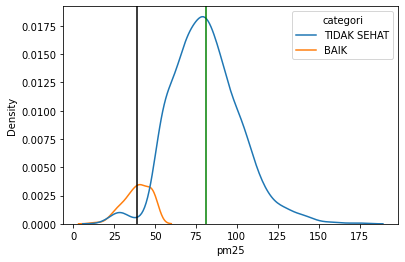

In [24]:
sns.kdeplot(data = dataset.replace("SEDANG", "TIDAK SEHAT"), x = "pm25", hue = "categori")
plt.axvline(dataset_tidak_baik.pm25.mean(), 0, 1, color = "g")
plt.axvline(dataset_baik.pm25.mean(), 0, 1, color = "k")

In [ ]:
# distribusi sangat dekat dengan normal (nilai skew fisher-pearson mendekati nol), imputasi mean
# mean 2 kelas berbeda jauh, imputasi berdasarkan kelas
# kesimpulan: untuk pm25 akan menggunakan mean dari perkelas untuk imputasi

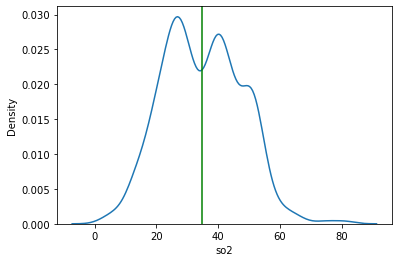

In [25]:
# Visualisasi fitur SO2

sns.kdeplot(data = dataset.replace("SEDANG", "TIDAK SEHAT"), x = "so2")
plt.axvline(dataset.so2.mean(), 0, 1, color = "g")

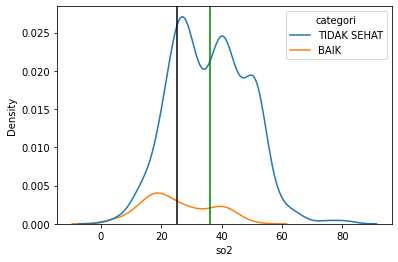

In [26]:
sns.kdeplot(data = dataset.replace("SEDANG", "TIDAK SEHAT"), x = "so2", hue = "categori")
plt.axvline(dataset_tidak_baik.so2.mean(), 0, 1, color = "g")
plt.axvline(dataset_baik.so2.mean(), 0, 1, color = "k")

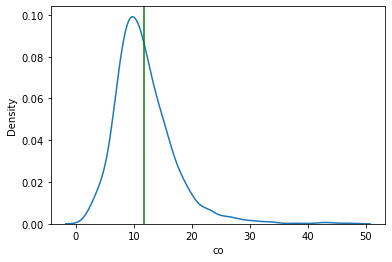

In [27]:
# Visualisasi fitur CO

sns.kdeplot(data = dataset.replace("SEDANG", "TIDAK SEHAT"), x = "co")
plt.axvline(dataset.co.mean(), 0, 1, color = "g")

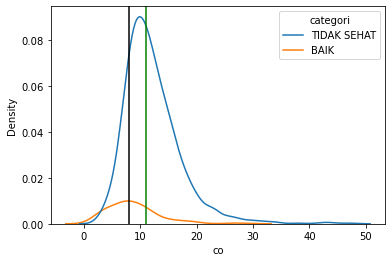

In [28]:
sns.kdeplot(data = dataset.replace("SEDANG", "TIDAK SEHAT"), x = "co", hue = "categori")
plt.axvline(dataset_tidak_baik.co.median(), 0, 1, color = "g")
plt.axvline(dataset_baik.co.median(), 0, 1, color = "k")

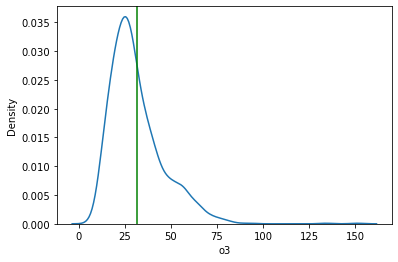

In [29]:
# Visualisasi fitur O3

sns.kdeplot(data = dataset.replace("SEDANG", "TIDAK SEHAT"), x = "o3")
plt.axvline(dataset.o3.mean(), 0, 1, color = "g")

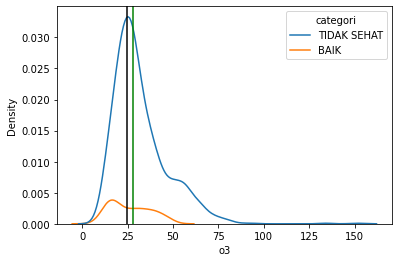

In [30]:
sns.kdeplot(data = dataset.replace("SEDANG", "TIDAK SEHAT"), x = "o3", hue = "categori")
plt.axvline(dataset_tidak_baik.o3.median(), 0, 1, color = "g")
plt.axvline(dataset_baik.o3.median(), 0, 1, color = "k")

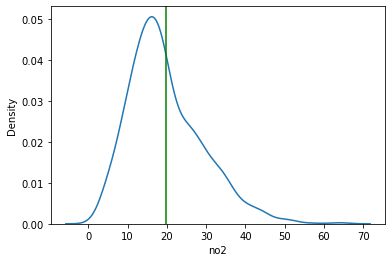

In [31]:
# Visualisasi fitur NO2

sns.kdeplot(data = dataset.replace("SEDANG", "TIDAK SEHAT"), x = "no2")
plt.axvline(dataset.no2.mean(), 0, 1, color = "g")

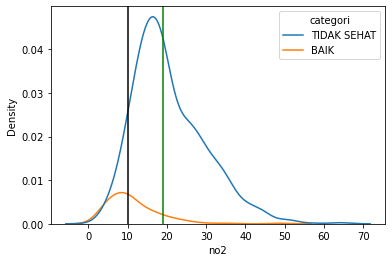

In [32]:
sns.kdeplot(data = dataset.replace("SEDANG", "TIDAK SEHAT"), x = "no2", hue = "categori")
plt.axvline(dataset_tidak_baik.no2.median(), 0, 1, color = "g")
plt.axvline(dataset_baik.no2.median(), 0, 1, color = "k")

Pearson Correlation

<AxesSubplot:>

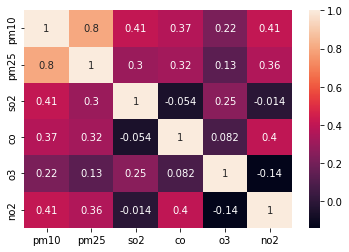

In [37]:
sns.heatmap(dataset.corr(numeric_only = True), annot=True)

T Test untuk PM10

In [ ]:
# h0    = mean pm10 untuk kelas 0 = mean pm10 untuk kelas 1
# h1    = mean pm10 untuk kelas 0 != mean pm10 untuk kelas 1

In [38]:
# perform t-test untuk 2 variabel
scs.ttest_ind(
    dataset_baik[dataset_baik.pm10.isnull() != True].pm10,
    dataset_tidak_baik[dataset_tidak_baik.pm10.isnull() != True].pm10
)

Ttest_indResult(statistic=-22.546103894423677, pvalue=1.8574927017476984e-94)

In [39]:
# nilai t critical untuk alpha 0.05
scs.t.ppf(0.05, df = (len(dataset) - 2))

-1.646060029911409

In [40]:
# dengan nilai t-value < t-critical dan nilai p-value < 0.05 maka h0 di reject
# mean antara kelas 0 dan kelas 1 untuk pm10 statistically significant

T Test untuk PM25

In [ ]:
# h0    = mean pm25 untuk kelas 0 = mean pm25 untuk kelas 1
# h1    = mean pm25 untuk kelas 0 != mean pm25 untuk kelas 1

In [41]:
# perform t-test untuk 2 variabel
scs.ttest_ind(
    dataset_baik[dataset_baik.pm25.isnull() != True].pm25,
    dataset_tidak_baik[dataset_tidak_baik.pm25.isnull() != True].pm25
)

Ttest_indResult(statistic=-19.93265114515386, pvalue=1.2071194192037668e-76)

In [42]:
# nilai t critical untuk alpha 0.05
scs.t.ppf(0.05, df = (len(dataset) - 2))

-1.646060029911409

In [ ]:
# dengan nilai t-value < t-critical dan nilai p-value < 0.05 maka h0 di reject
# mean antara kelas 0 dan kelas 1 untuk pm25 statistically significant

T Test untuk SO2

In [ ]:
# h0    = mean so2 untuk kelas 0 = mean so2 untuk kelas 1
# h1    = mean so2 untuk kelas 0 != mean so2 untuk kelas 1

In [43]:
# perform t-test untuk 2 variabel
scs.ttest_ind(
    dataset_baik[dataset_baik.so2.isnull() != True].so2,
    dataset_tidak_baik[dataset_tidak_baik.so2.isnull() != True].so2
)

Ttest_indResult(statistic=-9.395805327022734, pvalue=2.7768298500321463e-20)

In [44]:
# nilai t critical untuk alpha 0.05
scs.t.ppf(0.05, df = (len(dataset) - 2))

-1.646060029911409

In [45]:
# dengan nilai t-value < t-critical dan nilai p-value < 0.05 maka h0 di reject
# mean antara kelas 0 dan kelas 1 untuk so2 statistically significant

T Test untuk CO

In [46]:
# h0    = mean co untuk kelas 0 = mean co untuk kelas 1
# h1    = mean co untuk kelas 0 != mean co untuk kelas 1

In [47]:
# perform t-test untuk 2 variabel
scs.ttest_ind(
    dataset_baik[dataset_baik.co.isnull() != True].co,
    dataset_tidak_baik[dataset_tidak_baik.co.isnull() != True].co
)

Ttest_indResult(statistic=-7.510570497614444, pvalue=1.1161967662779388e-13)

In [48]:
# nilai t critical untuk alpha 0.05
scs.t.ppf(0.05, df = (len(dataset) - 2))

-1.646060029911409

In [49]:
# dengan nilai t-value < t-critical dan nilai p-value < 0.05 maka h0 di reject
# mean antara kelas 0 dan kelas 1 untuk co statistically significant

T Test untuk O3

In [50]:
# h0    = mean o3 untuk kelas 0 = mean o3 untuk kelas 1
# h1    = mean o3 untuk kelas 0 != mean o3 untuk kelas 1

In [51]:
# perform t-test untuk 2 variabel
scs.ttest_ind(
    dataset_baik[dataset_baik.o3.isnull() != True].o3,
    dataset_tidak_baik[dataset_tidak_baik.o3.isnull() != True].o3,
    equal_var = False
)

Ttest_indResult(statistic=-5.349594331630185, pvalue=2.526597136196726e-07)

In [52]:
# nilai t critical untuk alpha 0.05
scs.t.ppf(0.05, df = (len(dataset) - 2))

-1.646060029911409

In [53]:
# dengan nilai t-value < t-critical dan nilai p-value < 0.05 maka h0 di reject
# mean antara kelas 0 dan kelas 1 untuk o3 statistically significant

T Test untuk NO2

In [54]:
# h0    = mean no2 untuk kelas 0 = mean no2 untuk kelas 1
# h1    = mean no2 untuk kelas 0 != mean no2 untuk kelas 1

In [55]:
# perform t-test untuk 2 variabel
scs.ttest_ind(
    dataset_baik[dataset_baik.no2.isnull() != True].no2,
    dataset_tidak_baik[dataset_tidak_baik.no2.isnull() != True].no2
)

Ttest_indResult(statistic=-10.96980863380057, pvalue=8.436737461791034e-27)

In [56]:
# nilai t critical untuk alpha 0.05
scs.t.ppf(0.05, df = (len(dataset) - 2))

-1.646060029911409

In [57]:
# dengan nilai t-value < t-critical dan nilai p-value < 0.05 maka h0 di reject
# mean antara kelas 0 dan kelas 1 untuk no2 statistically significant

### Cek Imbalance Label

In [58]:
dataset.categori.value_counts()

SEDANG         944
TIDAK SEHAT    190
BAIK           132
Name: categori, dtype: int64

<AxesSubplot:xlabel='categori', ylabel='Count'>

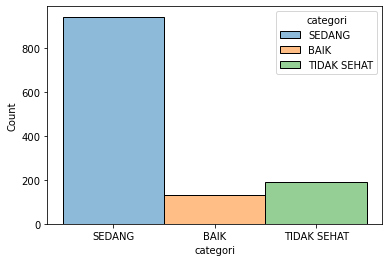

In [59]:
sns.histplot(data = dataset, x = "categori", hue = "categori")

## Cek Outliers

<AxesSubplot:xlabel='pm10'>

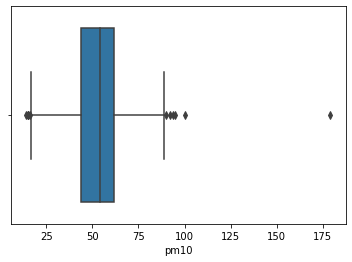

In [60]:
sns.boxplot(data = dataset, x = "pm10")

<AxesSubplot:xlabel='pm25'>

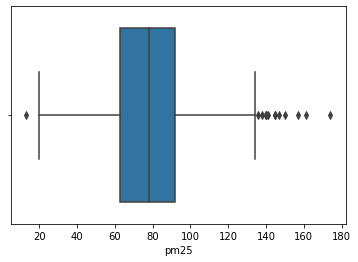

In [61]:
sns.boxplot(data = dataset, x = "pm25")

<AxesSubplot:xlabel='so2'>

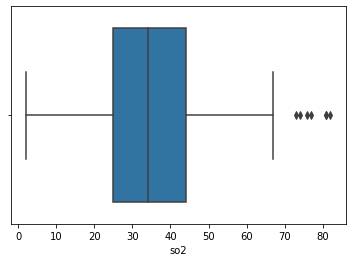

In [62]:
sns.boxplot(data = dataset, x = "so2")

<AxesSubplot:xlabel='co'>

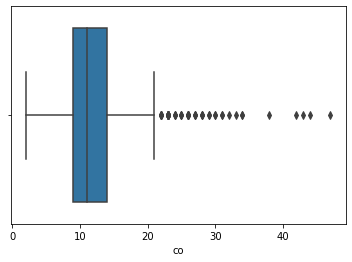

In [63]:
sns.boxplot(data = dataset, x = "co")

<AxesSubplot:xlabel='o3'>

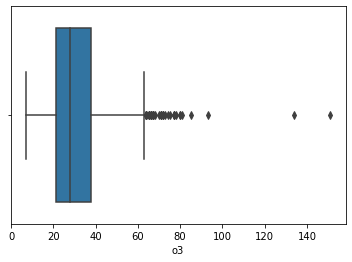

In [64]:
sns.boxplot(data = dataset, x = "o3")

<AxesSubplot:xlabel='no2'>

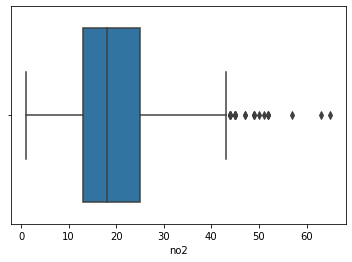

In [65]:
sns.boxplot(data = dataset, x = "no2")

## Kesimpulan?

1. Missing value handling
1.1. pm10      : mean kelas
1.2. pm25      : mean kelas
1.3. so2       : mean
1.4. co        : median
1.5. o3        : median
1.6. no2       : median

2. Join kategori sedang dan tidak sehat menjadi tidak baik

3. Balancing label baik dan tidak baik

4. Outlier removal